In [65]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma

Ce projet a été réalisé par : Roes Celia / Sanchez Mathew / Sekkat Adam

Ce Notebook contient que les etapes pour compressé l'image de polytech en png , nous vous avons envoyer un script python qui compresse une image peu importe si elle est en noir et blanc ou bien en couleur et aussi en fonction des extension png / jpeg / jpg

***Introduction***

array([[[0.20784314, 0.654902  , 1.        ],
        [0.20784314, 0.654902  , 1.        ],
        [0.20784314, 0.654902  , 1.        ],
        ...,
        [0.03137255, 0.26666668, 0.98039216],
        [0.03921569, 0.26666668, 0.99215686],
        [0.04705882, 0.27450982, 1.        ]],

       [[0.20392157, 0.6509804 , 1.        ],
        [0.20392157, 0.6509804 , 1.        ],
        [0.20392157, 0.6509804 , 1.        ],
        ...,
        [0.03137255, 0.25882354, 0.9843137 ],
        [0.03137255, 0.25882354, 0.99215686],
        [0.03921569, 0.26666668, 1.        ]],

       [[0.20784314, 0.654902  , 1.        ],
        [0.20784314, 0.654902  , 1.        ],
        [0.20784314, 0.654902  , 1.        ],
        ...,
        [0.04313726, 0.25882354, 0.99607843],
        [0.04313726, 0.25882354, 1.        ],
        [0.05098039, 0.26666668, 1.        ]],

       ...,

       [[0.54901963, 0.50980395, 0.5058824 ],
        [0.5568628 , 0.5176471 , 0.5137255 ],
        [0.5529412 , 0

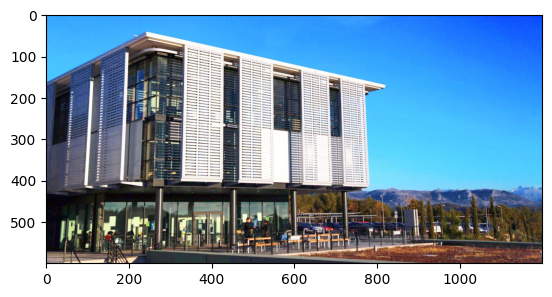

In [66]:
#Lecture de l'image
image_matrix = plt.imread('/content/pns_original.png')
plt.imshow(image_matrix) #affichage de l'image
image_matrix # affichage de la matrice representant l'image

In [67]:
#Tronquer l'image en multiple de 8 en x (lignes) et y(colonnes)
lignes,colonnes,canaux=np.shape(image_matrix) #on recupere le nombre de lignes , de colonnes et de canaux dans notre matrice lignes = 600 , colonnes = 1200 , canaux = 3
#on recupere les plus grand multiples de 8 pour chaque composante
Tronque_lignes = (lignes // 8)*8
Tronque_Colonnes = (colonnes // 8)*8
#on tronque sous l'image a des multiple de 8 en x et y
image_matrix_tronque = image_matrix[0:Tronque_lignes,0:Tronque_Colonnes,0:3]


In [68]:
#transformer les intensité entre 0 et 255
new_matrix = image_matrix_tronque * 255 #pour passer de valeur entre 0 et 1 a des valeur entre 0 et 255
new_matrix=new_matrix.astype('uint8') #pour passer de float a int
centred_matrix = new_matrix - 128 #pour centrer les valeurs
centred_matrix=centred_matrix.astype('int8')#pour avoir des int entre -127 et 128


In [69]:
def PMatrix():
  P = np.zeros((8,8)) #on initialise notre Matrice 8x8
  c0 = 1/(np.sqrt(2)) #c0 donné c0=1/sqrt(2)
  for i in range(1,8):
    for j in range(8):
      P[0,j] = 0.5 * c0 #pour i=0 P(0,j)= 0.5*c0
      P[i,j] = 1/2 * np.cos(((2*j + 1)*i*ma.pi)/16) #pour i>0 Ci = 1
  return P

In [70]:
PMatrix()

array([[ 0.35355339,  0.35355339,  0.35355339,  0.35355339,  0.35355339,
         0.35355339,  0.35355339,  0.35355339],
       [ 0.49039264,  0.41573481,  0.27778512,  0.09754516, -0.09754516,
        -0.27778512, -0.41573481, -0.49039264],
       [ 0.46193977,  0.19134172, -0.19134172, -0.46193977, -0.46193977,
        -0.19134172,  0.19134172,  0.46193977],
       [ 0.41573481, -0.09754516, -0.49039264, -0.27778512,  0.27778512,
         0.49039264,  0.09754516, -0.41573481],
       [ 0.35355339, -0.35355339, -0.35355339,  0.35355339,  0.35355339,
        -0.35355339, -0.35355339,  0.35355339],
       [ 0.27778512, -0.49039264,  0.09754516,  0.41573481, -0.41573481,
        -0.09754516,  0.49039264, -0.27778512],
       [ 0.19134172, -0.46193977,  0.46193977, -0.19134172, -0.19134172,
         0.46193977, -0.46193977,  0.19134172],
       [ 0.09754516, -0.27778512,  0.41573481, -0.49039264,  0.49039264,
        -0.41573481,  0.27778512, -0.09754516]])

In [71]:
#matrice de quantification

Q=np.array([[16,11,10,16,24,40,51,61],
            [12,12,13,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

In [72]:
def decomPMatrix(M,Tronque_lignes,Tronque_Colonnes):
  """
  Pour la fonction decomPMatrix : on parcours la matrice par bloc de 8x8 en colonnes et chaque bloc parcouru sera ajouté au tableau : decoMatrix
  Resultat : decoMatrix tableau contenant tout les bloc 8x8 qui compose notre image
  """
  decoMatrix = []
  for i in range(0,Tronque_lignes,8):
    for j in range(0,Tronque_Colonnes,8):
      decoMatrix.append(M[i:i+8,j:j+8])
  return decoMatrix


In [73]:
def compression(tab,Tronque_lignes,Tronque_Colonnes):
  """
  Pour la fonction Compression : Pour chaque Bloc 8x8 :
  -> On apllique le changement de Base D = PMP'
  -> Ensuite applique la matrice de de Quantification terme a terme D./Q
  -> et pour chaque bloc auquel on a appliqué les etapes precedentes on le rajoute dans compressed_tab
  -> on calcule le taux de compression

  Resultats : - On a un tableau qui contient tout les bloc 8x8 compressés
              - On affiche le taux de compression

  """
  P = PMatrix() # on récupére notre Matrice P
  Pprime =  np.transpose(P) # on obtient P' : transposée de P
  compressed_tab = [] # Tableau dans lequel on va stocker nos bloc 8x8 Compressés
  nb_nonNuls = 0 # Compteur pour les elements non nuls
  for i in range(3): #On lis les couleur i=0->Rouge ; i=1->vert ; i=2->bleue
    for M in tab :
      Temp = np.matmul(P,M[:,:,i])
      D = np.matmul(Temp,Pprime) #Appliquer le changement de base
      D = np.divide(D,Q) #Appliquer la matrice de quantification terme à terme D./Q
      D = np.trunc(D) #pour obtenir la partie entiere
      compressed_tab.append(D)
      nb_nonNuls = nb_nonNuls + np.count_nonzero(D[i]) #calcule pour chaque iteration le nombre d'element non nuls
  taux_compression=(1-nb_nonNuls/(Tronque_lignes*Tronque_Colonnes*3))*100 #calcule du taux de Compression
  print(f"Taux de Compression : {taux_compression}")
  return compressed_tab

In [74]:
def recompMatrix(tab,Tronque_lignes,Tronque_Colonnes):
  """
  Fonction qui a partir de nos tableau composé de bloc 8x8 recompose une matrice de la meme dimension que la matrice de base tronqué
  """
  recomposed_matrix = np.zeros((Tronque_lignes,Tronque_Colonnes,3)) #on cree une matrice 3d aux meme dimension que notre matrice tronqué
  recomposed_matrix_red = np.zeros((Tronque_lignes,Tronque_Colonnes)) # on crée une matrice 2D pour le canal Rouge
  recomposed_matrix_green = np.zeros((Tronque_lignes,Tronque_Colonnes)) # on crée une matrice 2D pour le canal Vert
  recomposed_matrix_blue = np.zeros((Tronque_lignes,Tronque_Colonnes)) #on créé une matrice 2D pour le canal Bleu
  #comme dit precedemment notre tab contient tout les bloc 8x8 :
  #    --> Le premier tiers contient : les bloc 8x8 dont le canal est Rouge
  #    --> Le second tiers contient : les bloc 8x8 dont le canal est Vert
  #    --> Le premier tiers contient : les bloc 8x8 dont le canal est Bleu
  n = len(tab)
  tab1 = np.ravel(tab[0:n//3])
  tab2 = np.ravel(tab[n//3:2*n//3])
  tab3 = np.ravel(tab[2*n//3 :n])
  k = 0
  # Chaque bloc 8x8 des matrices qu'on a initialisé plus haut on le remplace par son equivalent dans notre tableau de bloc 8x8
  for i in range(0,Tronque_lignes,8):
    for j in range(0,Tronque_Colonnes,8):
      recomposed_matrix_red[i:i+8,j:j+8] = np.reshape(tab1[64*k : 64*(k+1)],(8,8))
      recomposed_matrix_green[i:i+8,j:j+8] = np.reshape(tab2[64*k : 64*(k+1)],(8,8))
      recomposed_matrix_blue[i:i+8,j:j+8] = np.reshape(tab3[64*k : 64*(k+1)],(8,8))
      k = k +1
  recomposed_matrix[:,:,0] = recomposed_matrix_red
  recomposed_matrix[:,:,1] = recomposed_matrix_green
  recomposed_matrix[:,:,2] = recomposed_matrix_blue
  return recomposed_matrix


In [75]:
def decompression(tab):
  """
  Pour la fonction decompression : Pour chaque Bloc 8x8 Compressé:
  -> On le multiple par la matrice de Quantifiaction Q
  -> Ensuite applique la tranformée Inverse
  -> et pour chaque bloc auquel on a appliqué les etapes precedentes on le rajoute dans decompressed_tab
  -> on calcule le taux de compression

  Resultats : - On a un tableau qui contient tout les bloc 8x8 decompressés

  """

  P = PMatrix() # on recupere notre matrice P
  Pprime =  np.transpose(P) # on recupere la transposee de notre matrice P : P'
  decompressed_tab = [] # Tableau dans lequel on va stocker nos bloc 8x8 Decompressés
  for M in tab :
      DC = M*Q
      DInter = np.matmul(Pprime,DC)
      D = np.matmul(DInter,P)
      decompressed_tab.append(D)
  return decompressed_tab

In [76]:
#Post-Processing : Calcul d'erreur
def calcul_erreur(MatriceBase,MatriceDecompress):
  erreur = []
  for k in range(3):
    interm = (np.linalg.norm(MatriceBase[:,:,k])-np.linalg.norm(MatriceDecompress[:,:,k])) / np.linalg.norm(MatriceBase[:,:,k])
    erreur.append(interm)
  error = np.mean(erreur) * 100
  print(f"Pourcentage d'erreur :  {error} %")

Taux de Compression : 97.33541666666666


Pourcentage d'erreur :  2.138453445145533 %


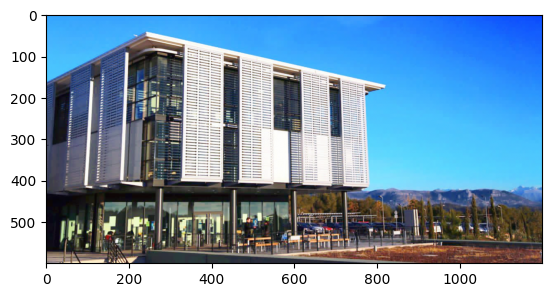

In [77]:
  tab = decomPMatrix(centred_matrix,Tronque_lignes,Tronque_Colonnes)
  comp = compression(tab,Tronque_lignes,Tronque_Colonnes)
  decomp = decompression(comp)
  recomp = recompMatrix(decomp,Tronque_lignes,Tronque_Colonnes)
  calcul_erreur(centred_matrix,recomp)
  MatriceDecompressInterm = recomp + 128
  MatriceDecompress = MatriceDecompressInterm / 255
  plt.imshow(MatriceDecompress)

***On refait ce qu'on a vu precedemment mais on utilisant le filtrage de haute de frequence***

In [78]:
def decomposition_hf(matrix,lignes,colonnes):
    decomp = []
    for i in range(0,lignes,8):
        for j in range(0,colonnes,8):
            decomp.append(matrix[i:i+8,j:j+8])
    return decomp

In [79]:
def compression_hf(M,P):
    D = np.zeros((8,8))
    Dmid = np.zeros((8,8))
    Dmid = np.matmul(P,M)
    D = np.matmul(Dmid,np.transpose(P))
    return D

In [80]:
def highfilter(D,threshold):
  """
  Ecrire description de la fonction
  """
  for i in range(8):
    for j in range(8):
      if i+j>=threshold:
        D[i,j]=0
  return D

In [81]:
P=np.zeros((8,8))

for i in range (8):
    for j in range (8):
        P[i,j]=(1/2)*ma.cos((2*j+1)*i*ma.pi/16)

P[0,:]*=1/ma.sqrt(2)

In [82]:
red = decomposition_hf(centred_matrix[:,:,0], Tronque_lignes,Tronque_Colonnes)
green = decomposition_hf(centred_matrix[:,:,1], Tronque_lignes,Tronque_Colonnes)
blue = decomposition_hf(centred_matrix[:,:,2], Tronque_lignes,Tronque_Colonnes)
non_zeros=0
for i in range(len(red)):
    red[i]=highfilter(compression_hf(red[i],P),6)
    green[i]=highfilter(compression_hf(green[i],P),6)
    blue[i]=highfilter(compression_hf(blue[i],P),6)
    non_zeros += np.count_nonzero(red[i]) + np.count_nonzero(green[i]) + np.count_nonzero(blue[i])

taux_compression = (1 - non_zeros/(Tronque_lignes*Tronque_Colonnes*3))*100

In [83]:
def decompression_hf(D,P):
    M = np.zeros((8,8))
    Mmid = np.zeros((8,8))
    Mmid = np.matmul(np.transpose(P),D)
    M = np.matmul(Mmid,P)
    return M

In [84]:
for i in range(len(red)):
    red[i]=decompression_hf(red[i],P)
    green[i]=decompression_hf(green[i],P)
    blue[i]=decompression_hf(blue[i],P)

-0.14901960784313725


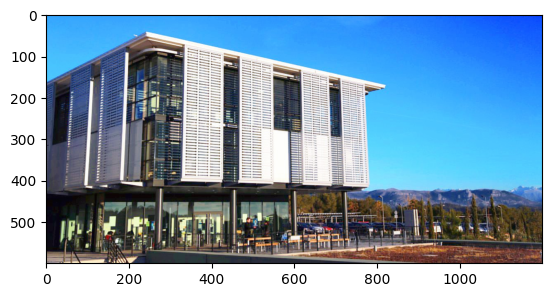

In [87]:
recomposed_matrix_hf = np.zeros((Tronque_lignes,Tronque_Colonnes,3))
recomposed_matrix_red_hf = np.zeros((Tronque_lignes,Tronque_Colonnes))
recomposed_matrix_green_hf = np.zeros((Tronque_lignes,Tronque_Colonnes))
recomposed_matrix_blue_hf = np.zeros((Tronque_lignes,Tronque_Colonnes))
n_hf = len(red)
red1 = np.ravel(red[0:n_hf])#rouges
green1 = np.ravel(green[0:n_hf])#verts
blue1 = np.ravel(blue[0:n_hf])#bleus

k=0
for i in range(0,Tronque_lignes,8):
   for j in range(0,Tronque_Colonnes,8):
     recomposed_matrix_red_hf[i:i+8,j:j+8] = np.reshape(red1[64*k : 64*(k+1)],(8,8))
     recomposed_matrix_green_hf[i:i+8,j:j+8] = np.reshape(green1[64*k : 64*(k+1)],(8,8))
     recomposed_matrix_blue_hf[i:i+8,j:j+8] = np.reshape(blue1[64*k : 64*(k+1)],(8,8))
     k = k+1

recomposed_matrix_hf[:,:,0] = recomposed_matrix_red_hf
recomposed_matrix_hf[:,:,1] = recomposed_matrix_green_hf
recomposed_matrix_hf[:,:,2] = recomposed_matrix_blue_hf

recomposed_matrix_hf=np.trunc(recomposed_matrix_hf)
recom255 = recomposed_matrix_hf + 128
recom01 = recom255 / 255

plt.imshow(recom01)
print(recom01.min())

plt.imsave('./compression_filtre.png',np.clip(recom01,0,1))